In [1]:
# Load images
import numpy as np
import nd2
import matplotlib.pyplot as plt
import imageio.v2 as iio

test_dataset = nd2.imread('/Users/hiram/Documents/EVERYTHING/20-29 Research/22 OliveiraLab/22.12 ND2 analyzer/nd2-analyzer/SR_1_5_2h_Pre-C_3h_IPTG_After10h_05_MC.nd2', dask=True)
test_pos_over_time = test_dataset[:, 0, 0]

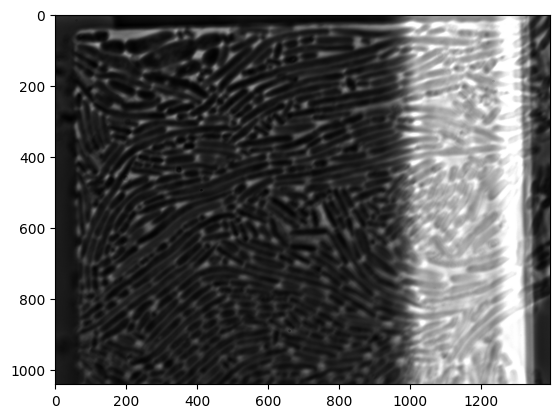

In [28]:
import cv2
norm = cv2.normalize(test_pos_over_time.compute(), None, 0, 65535, cv2.NORM_MINMAX)
plt.imshow(norm[0], cmap='gray')

In [11]:
from skimage.registration import phase_cross_correlation
import numpy as np

def register_timestack(images):
    registered = [images[0]]  # First frame as reference
    shifts = [(0, 0)]

    for i in range(1, len(images)):
        shift, error, phase_diff = phase_cross_correlation(
            images[0], images[i],
            upsample_factor=100  # for sub-pixel precision
        )
        registered.append(np.roll(images[i], shift.astype(int), axis=(0,1)))
        shifts.append(shift)

    return registered, shifts

In [3]:
import matplotlib.pyplot as plt
from time import sleep

# frames: a NumPy array of shape (N, H, W) or (N, H, W, 3)
def show_frames_matplotlib(frames, delay=0.1):
    plt.ion()  # interactive mode on
    fig, ax = plt.subplots()
    for frame in frames:
        ax.clear()
        if frame.ndim == 2:
            ax.imshow(frame, cmap='gray', vmin=0, vmax=255)
        else:
            ax.imshow(frame)
        ax.axis('off')
        display(fig)
        plt.pause(delay)
    plt.ioff()
    plt.show()

In [30]:
import imageio.v3 as iio
import numpy as np
import cv2

# Normalization
norm = cv2.normalize(test_pos_over_time.compute(), None, 0, 65535, cv2.NORM_MINMAX)
# plt.imshow(norm[0], cmap='gray')
# frames: (N,H,W) uint8
frames = ((norm / 65535) * 255).astype(np.uint8)
frames_rgb = np.stack([frames]*3, axis=-1)  # (N,H,W,3)

# frames_rgb: (N, H, W, 3) uint8 in RGB
h, w = frames_rgb.shape[1], frames_rgb.shape[2]
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter("timelapse.mp4", fourcc, 15.0, (w, h), isColor=True)

for fr in frames_rgb:
    fr_bgr = cv2.cvtColor(fr, cv2.COLOR_RGB2BGR)
    out.write(fr_bgr)

out.release()
print("Saved timelapse.mp4")


Saved timelapse.mp4


In [31]:
frames_rgb.shape

(37, 1040, 1392, 3)

In [32]:
# Do the registration
registered, shifts = register_timestack(frames)

In [33]:
import imageio.v3 as iio
import numpy as np
import cv2

# # frames: (N,H,W) uint8
# frames = ((test_pos_over_time / 65535) * 255).compute().astype(np.uint8)
# frames_rgb = np.stack([frames]*3, axis=-1)  # (N,H,W,3)

# frames_rgb: (N, H, W, 3) uint8 in RGB
h, w = frames.shape[1], frames.shape[2]
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter("registered.mp4", fourcc, 15.0, (w, h), isColor=True)

for fr in registered:
    fr_bgr = cv2.cvtColor(fr, cv2.COLOR_GRAY2BGR)
    out.write(fr_bgr)

out.release()
print("Saved timelapse.mp4")


Saved timelapse.mp4
